<a href="https://colab.research.google.com/github/rahulalshi6-max/DALAB1-EDA/blob/main/Exploring_Datasets_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Datasets with Python

In this short demo we will analyse a given dataset from 1978, which contains information about politicians having affairs. 

To analyse it, we will use a [Jupyter Notebook](http://jupyter.org/), which is basically a *REPL++* for Python. Entering a command with shift executes the line and prints the result.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To work with common files like CSV, JSON, Excel files etc., we will use [Pandas](http://pandas.pydata.org/), _an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language_™. Let's import it!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. The path of the file to read is relative to our notebook file. The path can also be an URL, supporting HTTP, FTP and also S3 if your data is stored inside an AWS S3 Bucket!

In [18]:
data = pd.read_csv('/content/sample_data/train (1).csv')

The first thing we will check is the size of our dataset. We can use `info()` to get the number of entries of each column.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now we know how many data is inside our file. Pandas is smart enough to parse the column titles by itself and estimate the data types of each column.

You may be curious how the data looks like. Let's see by using `head()`, which will print the first 5 rows.

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can access a column of our dataset by using bracket notation and the name of the column.

In [23]:
data['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

For categorical features like `sex`, you can also get the distributions of each value by using `value_counts()`.

In [24]:
data.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

But what about numerical values? It definitly makes no sense to count each distinct value. Therefore, we can use `describe()`.

In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


You can also access values like `mean` or `max` directly with the corrsponding methods. Let's see who is the oldest cheater!

This works for the whole dataframe as well. Pandas knows which values are numerical based on the datatype and hides the categorical features for you.

In [26]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [27]:
student = data.drop(['Survived'],axis=1)

The above statement returns a new dataframe (not a copy, modifying this data will modify the original as well), which can be accessed like before. Let's see how the numerical distribution is for our females.

In [28]:
student.head

<bound method NDFrame.head of      PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  Si

We can also create new rows. Specify the new column name in brackets and provide a function to set the data. We will create a new column containing True or False, wheather or not the person is below 30.

In [29]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [ ]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

This should be enought about Pandas. Let's get some visualisations!

## Visualize Data

To visualize our data, we will use [Seaborn](https://seaborn.pydata.org), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [30]:
import seaborn as sns

To see our charts directly in our notebook, we have to execute the following:

In [31]:
%matplotlib inline
sns.set()
sns.set_context('talk')

Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `distplot` by passing our series of ages as argument.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


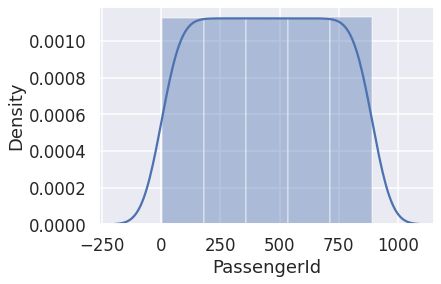

In [32]:
sns.distplot(data['PassengerId'],bins=5)

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase to number of buckets for our histogram by setting `bins` to 50.

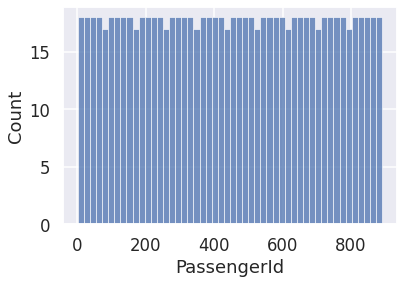

In [33]:
sns.histplot(data['PassengerId'],bins=50)

Interesting! The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

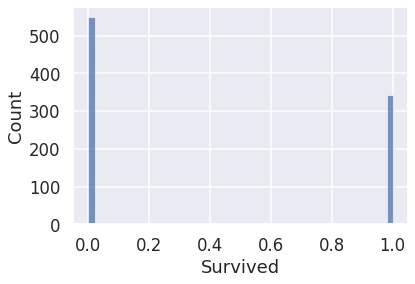

In [34]:
sns.histplot(data['Survived'],bins=50)

The average age of our people is around 32, but the most people are married for more than 14 years!

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called `jointplot` for this use case.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


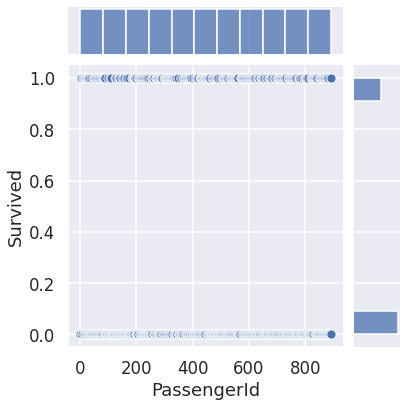

In [35]:
sns.jointplot(data['PassengerId'],data['Survived'])

To get a better feeling of how the number of affairs is affected by the number of years married, we can use a regression model by specifying `kind` as `reg`.

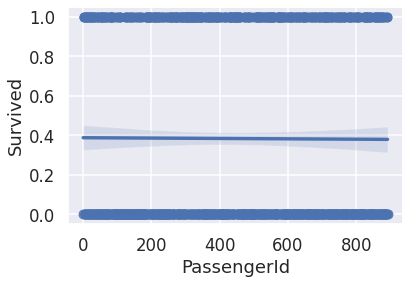

In [36]:
sns.regplot(x='PassengerId',y='Survived',data=data)

We can also use a kernel to kompare the density of two columns against each other, e.g. `age` and `ym`.

We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

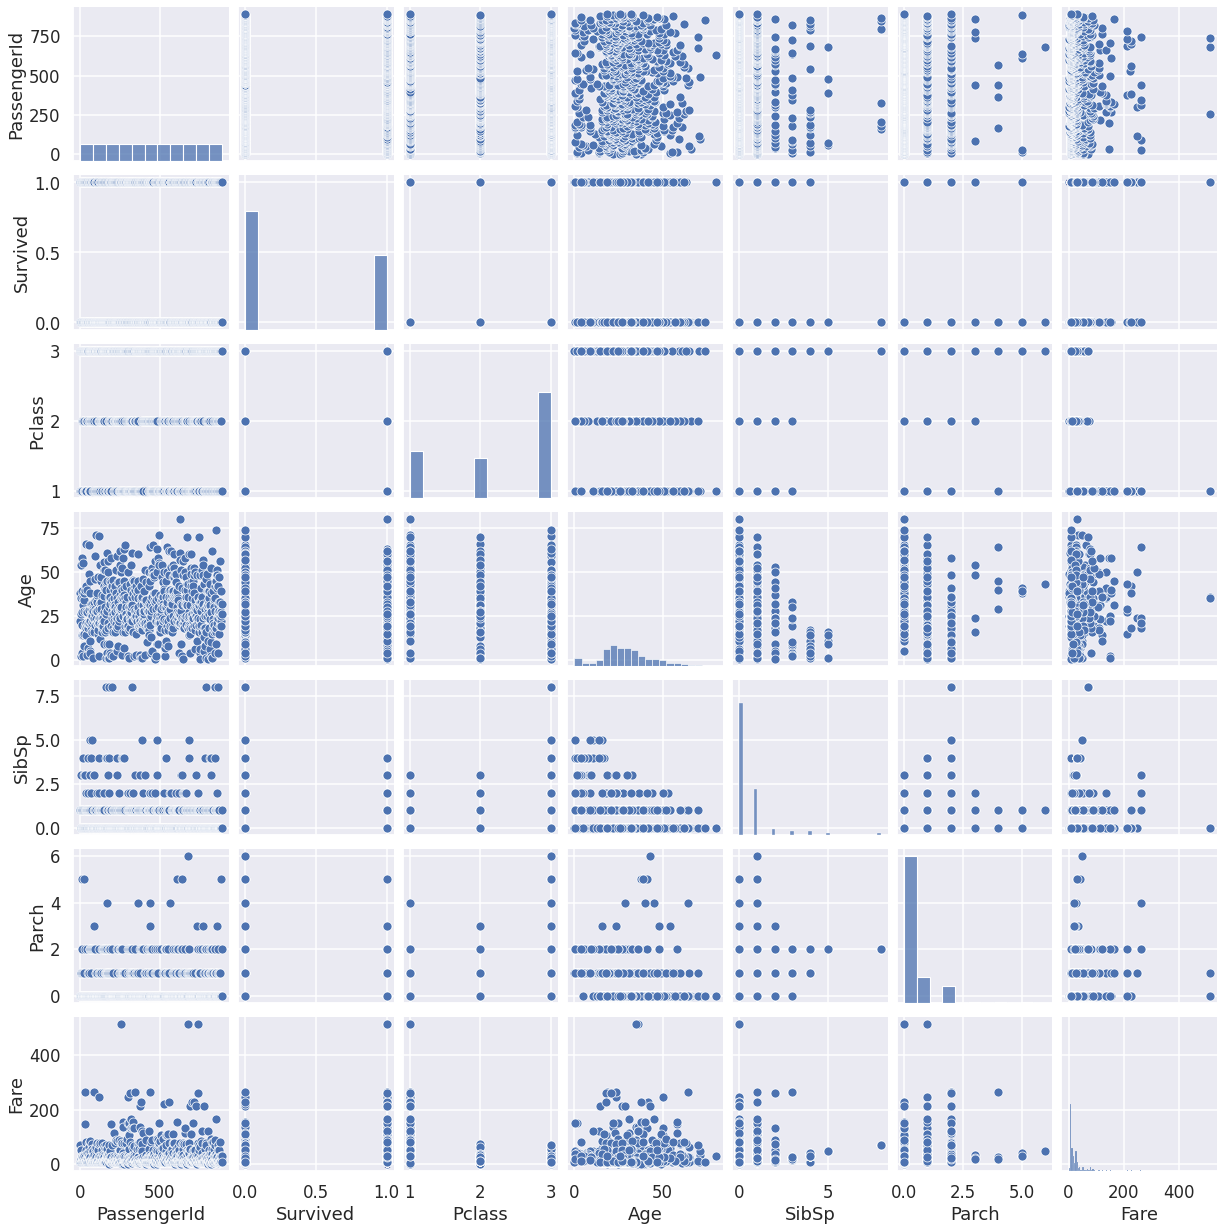

In [37]:
correlation=data.corr()
sns.pairplot(data)

You won't see any special in this data. We need to separate them by some kind of criteria. We can use our categorical values to do this! Seaborn uses a parameter called `hue` to do this. Let's separate our data by `sex` first. To make things even more interesting, let's create a regression for every plot, too!

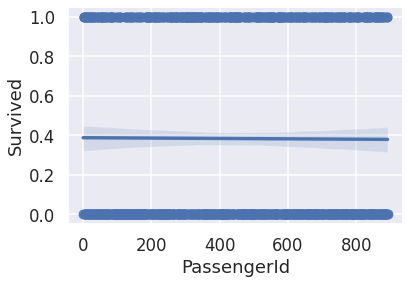

In [40]:
sns.regplot(x='PassengerId',y='Survived',data=data)

To get even better separation, we can use `lmplot` to compare just the fields we need.

Let's say we're interested in the number of affairs vs years married. We also whant to separate them by `sex`, `child` and `religious`. We will use `sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)` to achieve this.

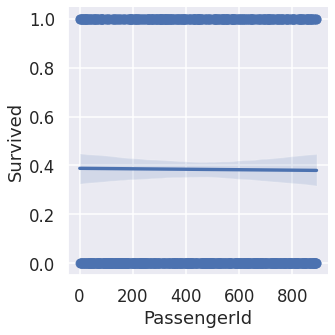

In [41]:
sns.lmplot(x="PassengerId", y="Survived",data=data)

Here are some categorical plots to explore the dataset even further.

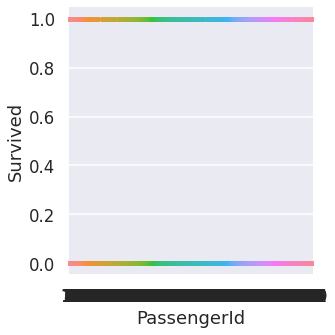

In [42]:
sns.catplot(x='PassengerId',y='Survived',data=data)


We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [ ]:
correlation=data.corr()

Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

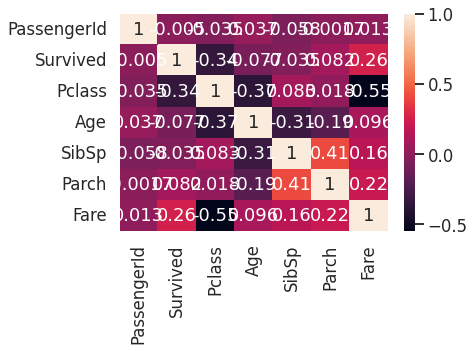

In [43]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
